# <font color=blue> Problem_03 : 
### <font color=red>Experiment with Ridge Regression

### Explore Dataset

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

In [2]:
X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# X --> Xtrain ( 242 by 64) --> Input data matrix
# y --> Ytrain ( 242 by 1)  --> Target vector

# Xtest --> ( 200 by 64 ) --> Testing
# ytest --> ( 200 by 1 )  --> Testing

# So, X and y will be used for training

In [3]:
print("Shpae of Xtrain : ",X.shape)
print("Shpae of ytrain : ",y.shape)
print("---------------------------")
print("Shpae of Xtest : ",Xtest.shape)
print("Shpae of ytest : ",ytest.shape)

Shpae of Xtrain :  (242, 64)
Shpae of ytrain :  (242, 1)
---------------------------
Shpae of Xtest :  (200, 64)
Shpae of ytest :  (200, 1)


### Tasks :
- #### Implement <font color = blue >learnRidgeRegression ( )

In [4]:
def learnOLERegression(X,y):
    '''
    Inputs:                                                         
          X = N x d  (Input data matrix for training)
          y = N x 1  (Target vector for training)                                                            
    Output: 
          w = d x 1   (Learned weight vector)
    '''
    
    # The formula for learning w in OLE : w = Inverse((Xtranspose * X)) * Xtranspose * y

    X_transpose   = np.transpose(X)
    X_X_transpose = np.dot(X_transpose,X)
    Inverse_X_X_transpose = np.linalg.inv(X_X_transpose) 
    
    w = np.dot(np.dot(Inverse_X_X_transpose,X_transpose),y)
    
    return w

In [5]:
def testOLERegression(w,Xtest,ytest):
    '''
    Inputs:
        w = d x 1
        Xtest = N x d
        ytest = X x 1
    Output:
        mse
    '''
    y_predict = np.dot(Xtest,w)
    
    diff = (ytest - y_predict)    
    diff_transpose = np.transpose(diff)
    N = 1 /len(Xtest)
    
    mse = np.dot( np.dot(N,diff_transpose), diff )

    
    # IMPLEMENT THIS METHOD
    return mse

In [6]:
def learnRidgeRegression(X,y,lambd):
    '''
    Inputs:                                                         
          X = N x d  (Input data matrix for training)
          y = N x 1  (Target vector for training)
          lambd = ridge parameter (scalar)
    Output: 
          w = d x 1   (Learned weight vector)
    '''
    # The formula for learning w in Ridge Regression : w = Inverse(( Lamda* Identity(d)) + Xtranspose * X) * Xtranspose * y
    
    I = np.identity(X.shape[1])
    lambd_I = np.dot(lambd,I)
    
    X_transpose   = np.transpose(X)
    X_X_transpose = np.dot(X_transpose,X)
    
    Inverse_part = np.linalg.inv(lambd_I + X_X_transpose) 
    
    w = np.dot(np.dot(Inverse_part,X_transpose),y)                                         
    return w



# Main code

In [7]:
# add intercept 
X_i     = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Learn weight vector w from training data

w   = learnOLERegression(X,y)     # without intercept
w_i = learnOLERegression(X_i,y)   # with intercept


print("Test Data")
print("----------")

mle   = testOLERegression(w,Xtest,ytest)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

print("\n")
 
print("Train Data")
print("----------")

mle   = testOLERegression(w,X,y)
mle_i = testOLERegression(w_i,X_i,y)

print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

Test Data
----------
MSE without intercept [[106775.36155592]]
MSE with intercept [[3707.84018177]]


Train Data
----------
MSE without intercept [[19099.44684457]]
MSE with intercept [[2187.16029493]]


In [8]:
w_ole = w_i

Text(0.5, 1.0, 'MSE for Test Data')

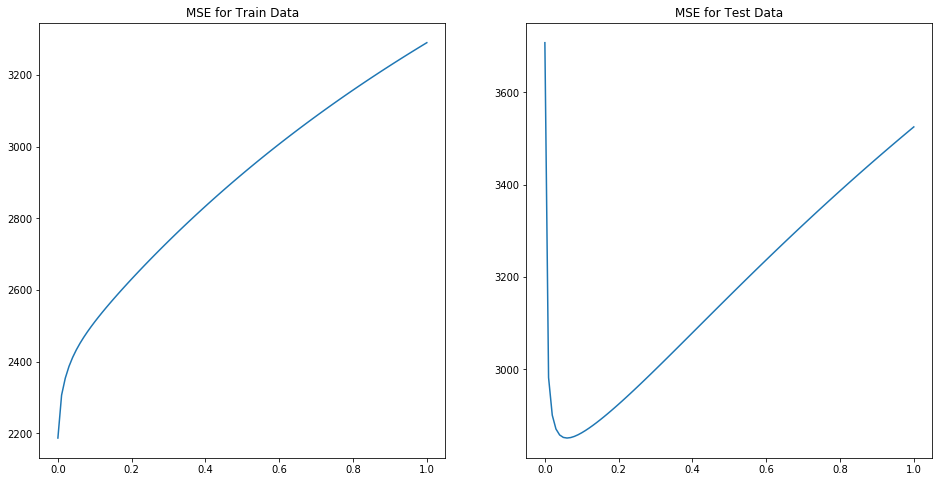

In [9]:
k = 101
lambdas = np.linspace(0, 1, num=k)

i = 0
mses3_train = np.zeros((k,1))
mses3       = np.zeros((k,1))

for lambd in lambdas:
    w_l            = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i]       = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[16,8])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')



In [10]:
lowest_MSE = np.min(mses3)
lowest_MSE

2851.330213443848

In [11]:
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mse = testOLERegression(w_l,Xtest_i,ytest)
    if lowest_MSE == mse:
        print(lambd)
        break
        

0.06


In [12]:
w_ridge = learnRidgeRegression(X_i,y,0.06)

# <font color=blue> Problem 04

In [13]:
def regressionObjVal(w, X, y, lambd):
    '''
      compute squared error (scalar) and gradient of squared error with respect 
      to w (vector) for the given data X and y and the regularization parameter lambda
      
    '''   
    # The formula for learning w in Ridge Regression using Gradient Descent :
    #     XTranspose * ( y - Xw)
    
    w_tranpose    = np.asmatrix(w).transpose()
    X_w_tranpose  = np.dot(X,w_tranpose)
    
    diff = (y - X_w_tranpose)
    
    diff_transpose = np.transpose(diff)
    
    diff_diff    = (np.dot(diff_transpose,diff))  
    w_w_tranpose = np.dot(np.asmatrix(w),w_tranpose)
    
   
    error = 0.5*(diff_diff + lambd*w_w_tranpose)
    
    error_grad = -(np.dot(np.transpose(X),diff)) + lambd*w_tranpose
    error_grad = np.squeeze(np.array(error_grad))

    return error, error_grad

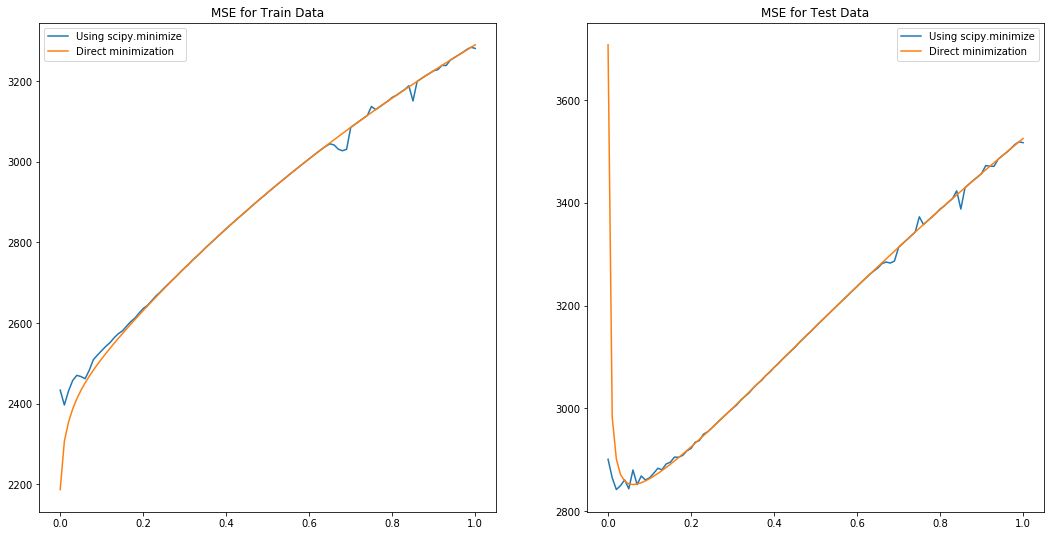

In [14]:
# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses4_train = np.zeros((k,1))
mses4 = np.zeros((k,1))
opts = {'maxiter' : 20}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train[i] = testOLERegression(w_l,X_i,y)
    mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
fig = plt.figure(figsize=[18,9])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses4_train)
plt.plot(lambdas,mses3_train)
plt.title('MSE for Train Data')
plt.legend(['Using scipy.minimize','Direct minimization'])

plt.subplot(1, 2, 2)
plt.plot(lambdas,mses4)
plt.plot(lambdas,mses3)
plt.title('MSE for Test Data')
plt.legend(['Using scipy.minimize','Direct minimization'])
plt.show()

In [15]:
lowest_MSE = np.min(mses4)
lowest_MSE

2841.577430015714

In [16]:
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    mses4_train = testOLERegression(w_l,X_i,y)
    mses4 = testOLERegression(w_l,Xtest_i,ytest)
    if lowest_MSE == mses4:
        print(lambd)
        break
    i = i + 1

0.02


# <font color=blue> Problem 05

In [17]:
def mapNonLinear(x,p):
    '''
    Inputs:                                                                  
        x - a single column vector (N x 1)                                       
        p - integer (>= 0)                                                       
    Outputs:                                                                 
        Xp - (N x (p+1)) 
    
    '''
    Xp = np.zeros((x.shape[0],p+1))
    for i in range(p+1):
        Xp[:,i] = pow(x,i)
    return Xp


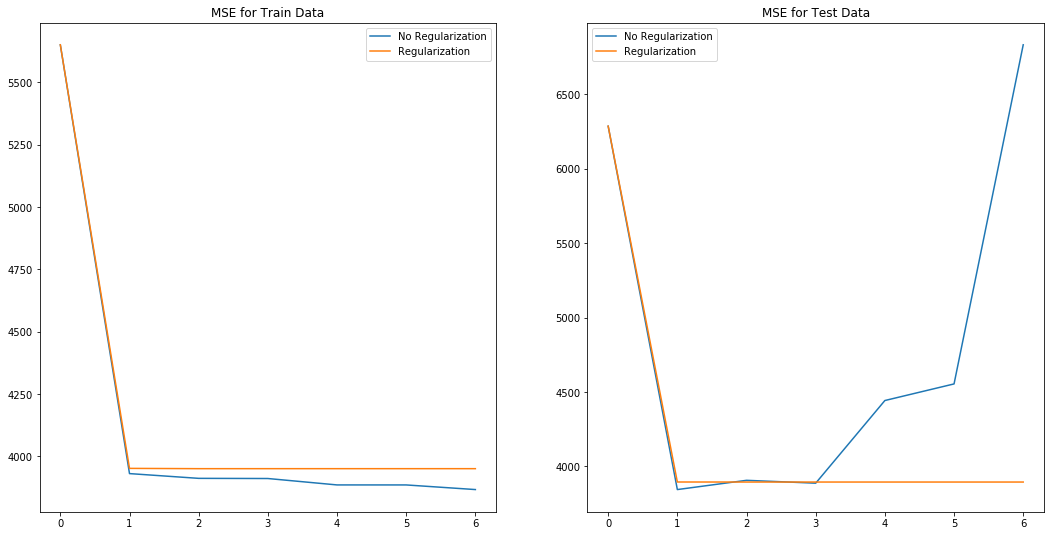

In [18]:
# Problem 5

pmax = 7
lambda_opt = 0.06 # REPLACE THIS WITH lambda_opt estimated from Problem 3
mses5_train = np.zeros((pmax,2))
mses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
    mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
    mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

fig = plt.figure(figsize=[18,9])
plt.subplot(1, 2, 1)
plt.plot(range(pmax),mses5_train)
plt.title('MSE for Train Data')
plt.legend(('No Regularization','Regularization'))
plt.subplot(1, 2, 2)
plt.plot(range(pmax),mses5)
plt.title('MSE for Test Data')
plt.legend(('No Regularization','Regularization'))
plt.show()
